In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d eldarsultanow/ml-bsd-dataset-integers

 99% 272M/274M [00:10<00:00, 33.9MB/s]
100% 274M/274M [00:10<00:00, 27.6MB/s]


In [ ]:
! unzip ml-bsd-dataset-integers.zip

Archive:  ml-bsd-dataset-integers.zip
  inflating: rank-vs-ap-integers.csv  


In [ ]:
import pandas as pd
import numpy as np
import sympy
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sympy import prime, isprime, primerange
import random
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score


In [ ]:
df = pd.read_csv("rank-vs-ap-integers.csv", index_col=False, header=None)


In [ ]:
new_columns = ['rank', 'con', 'root'] + [f'ap_{i}' for i in range(1, 1230)]

df.columns = new_columns

In [ ]:
df_2 = df.loc[df['rank'] == 2].sample(n=13616, random_state=1)
df_3 = df.loc[df['rank'] == 3]
df_3_2 = pd.concat([df_3, df_2])
df_1 = df.loc[df['rank'] == 1].sample(n=42290, random_state=1)
df_0 = df.loc[df['rank'] == 0]
df_0_1 = pd.concat([df_1, df_0])

df_sub = pd.concat([df_0_1, df_3_2])
df_sub['rank'].value_counts()

1    42290
0    42290
3    13616
2    13616
Name: rank, dtype: int64

In [ ]:
df_sub = df_sub[~df_sub['rank'].isin([4,5,6])]

In [ ]:
feature_col = [col for col in df.columns if col.startswith('ap_')]
X = df_sub[ feature_col]
y = df_sub['rank']

In [ ]:
print(X)

        ap_1  ap_2  ap_3  ap_4  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ...  \
76492     -1     1     0     4    -4     5    -2     2    -8     -6  ...   
62660     -1     0     0     2     6     2    -1     4     3     -6  ...   
26131      0     0     4     1     0     3     2     0     7      5  ...   
74087     -1    -2     2     2     4     3     0     5     8      0  ...   
8084       2     1     2    -1     4    -6     5     4    -8      3  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
117731    -1     2     1     4    -2     5     0    -3     2      9  ...   
133602    -1     1    -1    -4     4     4     4    -3    -3      4  ...   
126113    -1    -1    -1    -4    -4    -2    -2     2     8      3  ...   
113982    -1     2     0     1    -4     5    -6     4     1     -5  ...   
120408    -2     0     2     0     3     2     5    -8    -1      6  ...   

        ap_1220  ap_1221  ap_1222  ap_1223  ap_1224  ap_1225  ap_1226  \
76492        5

In [ ]:
top_features = ['ap_4', 'ap_3', 'ap_5', 'ap_6', 'ap_7', 'ap_8', 'ap_9', 'ap_10', 'ap_11', 'ap_12', 'ap_13', 'ap_14', 'ap_16', 'ap_15', 'ap_17', 'ap_18', 'ap_20', 'ap_19', 'ap_21', 'ap_23', 'ap_22', 'ap_24', 'ap_26', 'ap_29', 'ap_27', 'ap_28', 'ap_30', 'ap_25', 'ap_31', 'ap_32', 'ap_33', 'ap_36', 'ap_37', 'ap_43', 'ap_34', 'ap_35', 'ap_38', 'ap_40', 'ap_39', 'ap_44', 'ap_47', 'ap_42', 'ap_49', 'ap_46', 'ap_45', 'ap_48', 'ap_52', 'ap_53', 'ap_61', 'ap_62']


In [ ]:
from sympy import primepi

def get_r_sequence(N:int):
  pi_N = primepi(N)
  res = [None]*pi_N

  for i in range(1,pi_N+1):
    res[i-1] = -1 + i*2/pi_N
  return res

print(len(get_r_sequence(2000)))
print(get_r_sequence(2000))

303
[-301/303, -299/303, -99/101, -295/303, -293/303, -97/101, -289/303, -287/303, -95/101, -283/303, -281/303, -93/101, -277/303, -275/303, -91/101, -271/303, -269/303, -89/101, -265/303, -263/303, -87/101, -259/303, -257/303, -85/101, -253/303, -251/303, -83/101, -247/303, -245/303, -81/101, -241/303, -239/303, -79/101, -235/303, -233/303, -77/101, -229/303, -227/303, -75/101, -223/303, -221/303, -73/101, -217/303, -215/303, -71/101, -211/303, -209/303, -69/101, -205/303, -203/303, -67/101, -199/303, -197/303, -65/101, -193/303, -191/303, -63/101, -187/303, -185/303, -61/101, -181/303, -179/303, -59/101, -175/303, -173/303, -57/101, -169/303, -167/303, -55/101, -163/303, -161/303, -53/101, -157/303, -155/303, -51/101, -151/303, -149/303, -49/101, -145/303, -143/303, -47/101, -139/303, -137/303, -45/101, -133/303, -131/303, -43/101, -127/303, -125/303, -41/101, -121/303, -119/303, -39/101, -115/303, -113/303, -37/101, -109/303, -107/303, -35/101, -103/303, -1/3, -33/101, -97/303, -95/

In [ ]:
primes = [-301/303, -299/303, -99/101, -295/303, -293/303, -97/101, -289/303, -287/303, -95/101, -283/303, -281/303, -93/101, -277/303, -275/303, -91/101, -271/303, -269/303, -89/101, -265/303, -263/303, -87/101, -259/303, -257/303, -85/101, -253/303, -251/303, -83/101, -247/303, -245/303, -81/101, -241/303, -239/303, -79/101, -235/303, -233/303, -77/101, -229/303, -227/303, -75/101, -223/303, -221/303, -73/101, -217/303, -215/303, -71/101, -211/303, -209/303, -69/101, -205/303, -203/303, -67/101, -199/303, -197/303, -65/101, -193/303, -191/303, -63/101, -187/303, -185/303, -61/101, -181/303, -179/303, -59/101, -175/303, -173/303, -57/101, -169/303, -167/303, -55/101, -163/303, -161/303, -53/101, -157/303, -155/303, -51/101, -151/303, -149/303, -49/101, -145/303, -143/303, -47/101, -139/303, -137/303, -45/101, -133/303, -131/303, -43/101, -127/303, -125/303, -41/101, -121/303, -119/303, -39/101, -115/303, -113/303, -37/101, -109/303, -107/303, -35/101, -103/303, -1/3, -33/101, -97/303, -95/303, -31/101, -91/303, -89/303, -29/101, -85/303, -83/303, -27/101, -79/303, -77/303, -25/101, -73/303, -71/303, -23/101, -67/303, -65/303, -21/101, -61/303, -59/303, -19/101, -55/303, -53/303, -17/101, -49/303, -47/303, -15/101, -43/303, -41/303, -13/101, -37/303, -35/303, -11/101, -31/303, -29/303, -9/101, -25/303, -23/303, -7/101, -19/303, -17/303, -5/101, -13/303, -11/303, -3/101, -7/303, -5/303, -1/101, -1/303, 1/303, 1/101, 5/303, 7/303, 3/101, 11/303, 13/303, 5/101, 17/303, 19/303, 7/101, 23/303, 25/303, 9/101, 29/303, 31/303, 11/101, 35/303, 37/303, 13/101, 41/303, 43/303, 15/101, 47/303, 49/303, 17/101, 53/303, 55/303, 19/101, 59/303, 61/303, 21/101, 65/303, 67/303, 23/101, 71/303, 73/303, 25/101, 77/303, 79/303, 27/101, 83/303, 85/303, 29/101, 89/303, 91/303, 31/101, 95/303, 97/303, 33/101, 1/3, 103/303, 35/101, 107/303, 109/303, 37/101, 113/303, 115/303, 39/101, 119/303, 121/303, 41/101, 125/303, 127/303, 43/101, 131/303, 133/303, 45/101, 137/303, 139/303, 47/101, 143/303, 145/303, 49/101, 149/303, 151/303, 51/101, 155/303, 157/303, 53/101, 161/303, 163/303, 55/101, 167/303, 169/303, 57/101, 173/303, 175/303, 59/101, 179/303, 181/303, 61/101, 185/303, 187/303, 63/101, 191/303, 193/303, 65/101, 197/303, 199/303, 67/101, 203/303, 205/303, 69/101, 209/303, 211/303, 71/101, 215/303, 217/303, 73/101, 221/303, 223/303, 75/101, 227/303, 229/303, 77/101, 233/303, 235/303, 79/101, 239/303, 241/303, 81/101, 245/303, 247/303, 83/101, 251/303, 253/303, 85/101, 257/303, 259/303, 87/101, 263/303, 265/303, 89/101, 269/303, 271/303, 91/101, 275/303, 277/303, 93/101, 281/303, 283/303, 95/101, 287/303, 289/303, 97/101, 293/303, 295/303, 99/101, 299/303, 301/303, 1]


In [ ]:
abs_prime = [abs(prime) for prime in primes]

In [ ]:
ap_cols = [col for col in df_sub.columns if col.startswith("ap_")]
df_sub[ap_cols] = df_sub[ap_cols].replace(0, np.nan)
df_sub[ap_cols] = df_sub[ap_cols].fillna(df_sub[ap_cols].mean())

In [ ]:
for i in range(len(abs_prime)):
    ap_col = f"ap_{i+1}"
    df_sub[ap_col].dropna(inplace=True)
    if (df_sub[ap_col] == 0).any():
        df_sub[ap_col].replace(0, df_sub[ap_col].mean(), inplace=True)
    df_sub[ap_col] = df_sub[ap_col].apply(lambda x, p=abs_prime[i]: x / math.sqrt(p))


In [ ]:
print(X)

In [ ]:
feature_col = [col for col in df.columns if col.startswith('ap_')]
X = df_sub[['root']+ top_features]
y = df_sub['rank']

In [ ]:
print(y)

In [ ]:
from sklearn.decomposition import FastICA
import xgboost as xgb
n_components = 4  
ica = FastICA(n_components=n_components, random_state=10)
independent_components = ica.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
X = df_sub[top_features]
y = df_sub['rank']

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

# K-means Clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: ignored

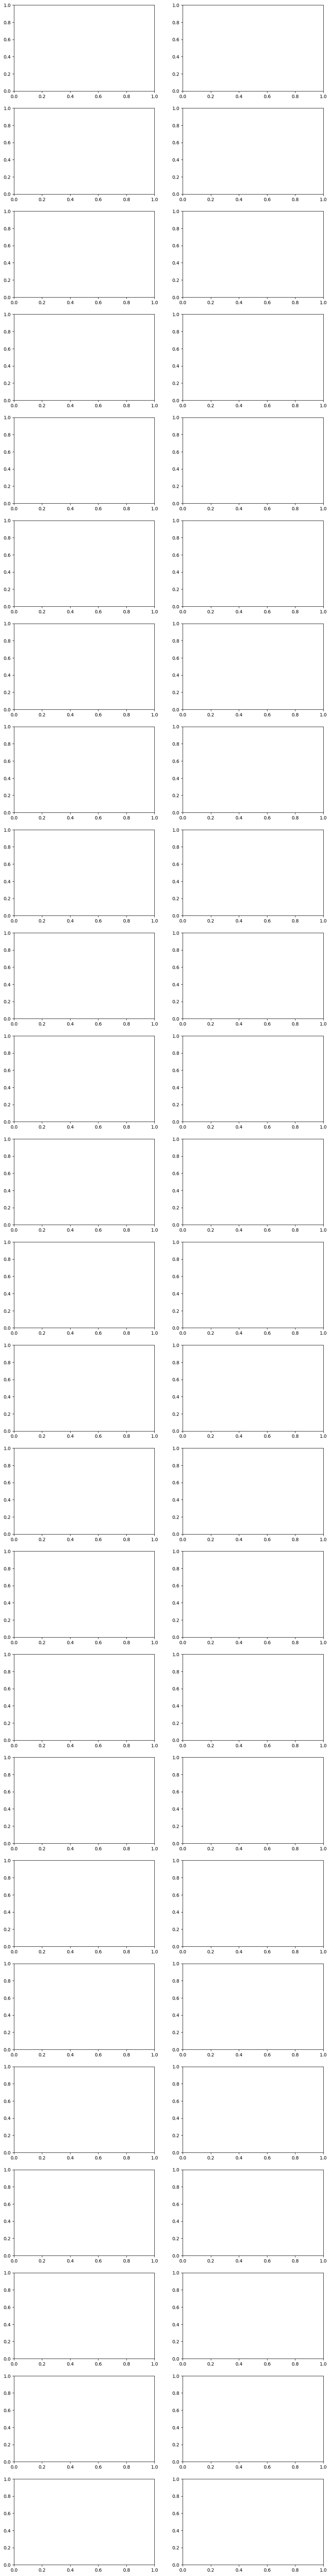

In [ ]:
import matplotlib.pyplot as plt

num_columns = X.shape[1]

# Set up the subplot grid dynamically based on the number of columns
n_rows = int(np.ceil(num_columns / 2))
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))

# Flatten the axes array if necessary
if n_rows > 1:
    axes = axes.flatten()

# Iterate over the columns and plot the data points
for i, ax in enumerate(axes):
    if i < num_columns:
        ax.scatter(X[:, i], X[:, i], c=kmeans_labels, cmap='viridis')
        ax.set_xlabel(f'Feature {i}')
        ax.set_ylabel(f'Feature {i}')
        ax.set_title(f'K-means Clustering - Feature {i}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_components, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)




[0]	train-auc:0.55082	validation-auc:0.54865
[10]	train-auc:0.61484	validation-auc:0.61362
[20]	train-auc:0.64112	validation-auc:0.63954
[30]	train-auc:0.65944	validation-auc:0.65788
[40]	train-auc:0.67519	validation-auc:0.67396
[50]	train-auc:0.68938	validation-auc:0.68832
[60]	train-auc:0.69836	validation-auc:0.69696
[70]	train-auc:0.71092	validation-auc:0.70951
[80]	train-auc:0.72034	validation-auc:0.71905
[90]	train-auc:0.72943	validation-auc:0.72812
[100]	train-auc:0.73657	validation-auc:0.73534
[110]	train-auc:0.74451	validation-auc:0.74347
[120]	train-auc:0.75245	validation-auc:0.75181
[130]	train-auc:0.76010	validation-auc:0.75998
[140]	train-auc:0.76888	validation-auc:0.76871
[150]	train-auc:0.77656	validation-auc:0.77648
[160]	train-auc:0.78311	validation-auc:0.78282
[170]	train-auc:0.78909	validation-auc:0.78897
[180]	train-auc:0.79486	validation-auc:0.79496
[190]	train-auc:0.80038	validation-auc:0.80025
[200]	train-auc:0.80589	validation-auc:0.80598
[210]	train-auc:0.81092	

In [ ]:


dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)


test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)
test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)


test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

Test Accuracy: 0.37453792034342953
val Accuracy: 0.7869600214649852


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000, 
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)
dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)


test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)
test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)


test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

[0]	train-auc:0.68083	validation-auc:0.68243
[10]	train-auc:0.69131	validation-auc:0.69290
[20]	train-auc:0.69534	validation-auc:0.69711
[30]	train-auc:0.69925	validation-auc:0.70074
[40]	train-auc:0.70315	validation-auc:0.70454
[50]	train-auc:0.70628	validation-auc:0.70759
[60]	train-auc:0.70877	validation-auc:0.71008
[70]	train-auc:0.71224	validation-auc:0.71351
[80]	train-auc:0.71525	validation-auc:0.71658
[90]	train-auc:0.71734	validation-auc:0.71873
[100]	train-auc:0.71934	validation-auc:0.72078
[110]	train-auc:0.72176	validation-auc:0.72317
[120]	train-auc:0.72466	validation-auc:0.72587
[130]	train-auc:0.72668	validation-auc:0.72791
[140]	train-auc:0.72892	validation-auc:0.72994
[150]	train-auc:0.73071	validation-auc:0.73161
[160]	train-auc:0.73348	validation-auc:0.73431
[170]	train-auc:0.73527	validation-auc:0.73597
[180]	train-auc:0.73732	validation-auc:0.73790
[190]	train-auc:0.73969	validation-auc:0.74020
[200]	train-auc:0.74164	validation-auc:0.74211
[210]	train-auc:0.74298	

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}


xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1500,  
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)
dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)



test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)

test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)



test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

[0]	train-auc:0.80149	validation-auc:0.80304
[10]	train-auc:0.83061	validation-auc:0.83197
[20]	train-auc:0.83331	validation-auc:0.83489
[30]	train-auc:0.83594	validation-auc:0.83769
[40]	train-auc:0.83862	validation-auc:0.84044
[50]	train-auc:0.84131	validation-auc:0.84306
[60]	train-auc:0.84345	validation-auc:0.84511
[70]	train-auc:0.84569	validation-auc:0.84748
[80]	train-auc:0.84781	validation-auc:0.84964
[90]	train-auc:0.85032	validation-auc:0.85218
[100]	train-auc:0.85219	validation-auc:0.85411
[110]	train-auc:0.85427	validation-auc:0.85635
[120]	train-auc:0.85641	validation-auc:0.85846
[130]	train-auc:0.85864	validation-auc:0.86066
[140]	train-auc:0.86096	validation-auc:0.86301
[150]	train-auc:0.86326	validation-auc:0.86526
[160]	train-auc:0.86585	validation-auc:0.86777
[170]	train-auc:0.86797	validation-auc:0.86989
[180]	train-auc:0.86999	validation-auc:0.87195
[190]	train-auc:0.87200	validation-auc:0.87396
[200]	train-auc:0.87428	validation-auc:0.87619
[210]	train-auc:0.87645	

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42
}


xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1500,  
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)
dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)



test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)

test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)



test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

[0]	train-auc:0.79943	validation-auc:0.80051
[10]	train-auc:0.85137	validation-auc:0.85349
[20]	train-auc:0.85275	validation-auc:0.85496
[30]	train-auc:0.85498	validation-auc:0.85718
[40]	train-auc:0.85659	validation-auc:0.85879
[50]	train-auc:0.85857	validation-auc:0.86093
[60]	train-auc:0.86079	validation-auc:0.86323
[70]	train-auc:0.86304	validation-auc:0.86543
[80]	train-auc:0.86514	validation-auc:0.86760
[90]	train-auc:0.86736	validation-auc:0.86986
[100]	train-auc:0.86948	validation-auc:0.87206
[110]	train-auc:0.87128	validation-auc:0.87370
[120]	train-auc:0.87381	validation-auc:0.87623
[130]	train-auc:0.87588	validation-auc:0.87832
[140]	train-auc:0.87811	validation-auc:0.88063
[150]	train-auc:0.88052	validation-auc:0.88303
[160]	train-auc:0.88254	validation-auc:0.88495
[170]	train-auc:0.88439	validation-auc:0.88677
[180]	train-auc:0.88644	validation-auc:0.88882
[190]	train-auc:0.88830	validation-auc:0.89068
[200]	train-auc:0.89029	validation-auc:0.89268
[210]	train-auc:0.89216	

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 10
}


xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1500,  
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)
dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)



test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)

test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)



test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

[0]	train-auc:0.90570	validation-auc:0.90529
[10]	train-auc:0.94925	validation-auc:0.94856
[20]	train-auc:0.95897	validation-auc:0.95827
[30]	train-auc:0.96622	validation-auc:0.96557
[40]	train-auc:0.97141	validation-auc:0.97082
[50]	train-auc:0.97627	validation-auc:0.97569
[60]	train-auc:0.97975	validation-auc:0.97911
[70]	train-auc:0.98222	validation-auc:0.98167
[80]	train-auc:0.98407	validation-auc:0.98352
[90]	train-auc:0.98588	validation-auc:0.98535
[100]	train-auc:0.98738	validation-auc:0.98685
[110]	train-auc:0.98854	validation-auc:0.98801
[120]	train-auc:0.98948	validation-auc:0.98894
[130]	train-auc:0.99031	validation-auc:0.98977
[140]	train-auc:0.99119	validation-auc:0.99069
[150]	train-auc:0.99200	validation-auc:0.99153
[160]	train-auc:0.99279	validation-auc:0.99234
[170]	train-auc:0.99365	validation-auc:0.99325
[180]	train-auc:0.99442	validation-auc:0.99403
[190]	train-auc:0.99513	validation-auc:0.99476
[200]	train-auc:0.99578	validation-auc:0.99543
[210]	train-auc:0.99633	

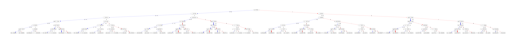

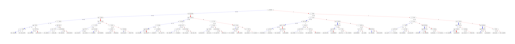

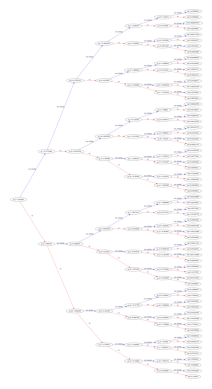

In [ ]:
from sklearn import datasets
from sklearn import metrics
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plot_tree(xgb_model); plt.show()
plot_tree(xgb_model, num_trees=4); plt.show()
plot_tree(xgb_model, num_trees=0, rankdir='LR'); plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = df_sub[['root']+ top_features].values
y = df_sub['rank'].values
# Create a scatter plot for predicted ranks
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each rank
rank_colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green'}

# Plot the bubbles with colors and transparency
for rank in np.unique(test_pro):
    rank_indices = np.where(test_pro.round() == rank)[0]
    ax.scatter(X[ 0], X[ 1], X[ 2], X[ 3],
               c=rank_colors[int(rank)], marker='o', label=f"Rank {int(rank)}")

# Add extra information: x-range and rank count
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()

# Additional features for visualization
ax.view_init(elev=20, azim=30)  # Set the view angle
ax.dist = 10  # Adjust the distance between the plot and camera

plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


In [ ]:
print(independent_components)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

val_predictions = xgb_model.predict(X_test_val)
val_accuracy = np.sum(val_predictions == y_test_val) / len(y_test_val)
print("Validation Accuracy:", val_accuracy)

test_predictions = xgb_model.predict(X_test)
test_accuracy = np.sum(test_predictions == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9623468383865487
Test Accuracy: 0.8012610302885762


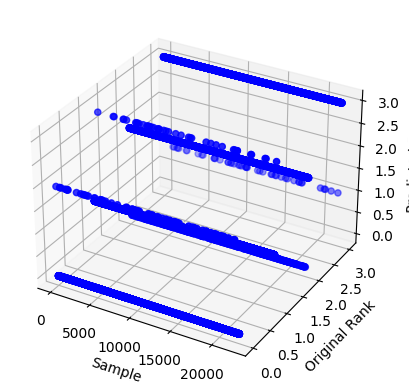

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = range(len(y_test_val))
y = y_test_val
z = val_predictions

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Sample')
ax.set_ylabel('Original Rank')
ax.set_zlabel('Predicted Rank')

plt.show()

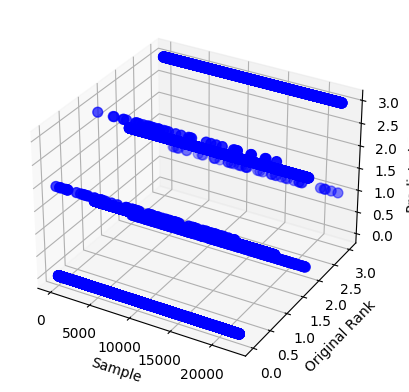

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = range(len(y_test_val))
y = y_test_val
z = val_predictions

default_size = 50

ax.scatter(x, y, z, c='b', marker='o', s=default_size)

ax.set_xlabel('Sample')
ax.set_ylabel('Original Rank')
ax.set_zlabel('Predicted Rank')

plt.show()

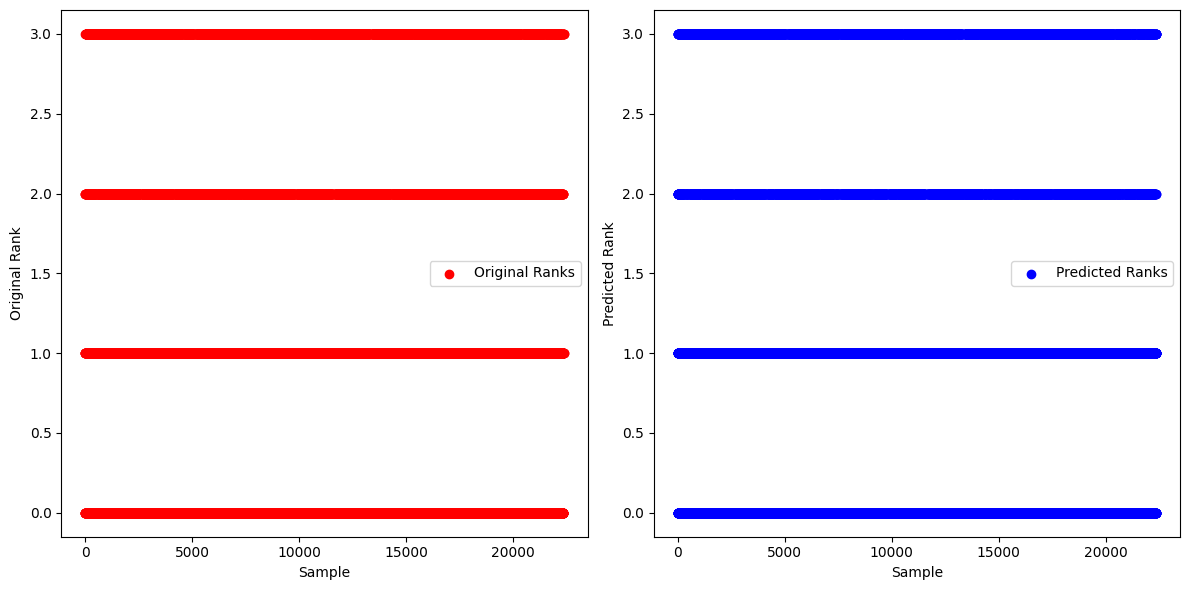

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = range(len(y_test_val))
y = y_test_val
z = val_predictions

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x, y, c='r', label='Original Ranks')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Original Rank')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.scatter(x, z, c='b', label='Predicted Ranks')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Predicted Rank')
ax2.legend()

plt.tight_layout()

plt.show()

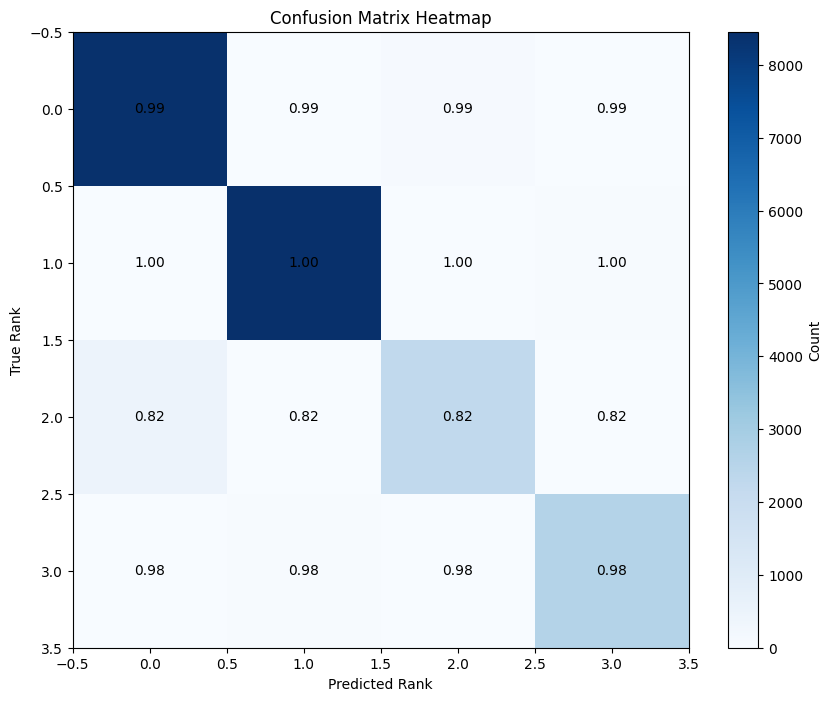

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


confusion_matrix = np.zeros((np.max(y_test_val) + 1, np.max(y_test_val) + 1), dtype=int)
for true_rank, predicted_rank in zip(y_test_val, val_predictions):
    confusion_matrix[true_rank, predicted_rank] += 1

accuracy_per_rank = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(confusion_matrix, cmap='Blues')

cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Count')

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax.text(j, i, f'{accuracy_per_rank[i]:.2f}', ha='center', va='center', color='black')

ax.set_xlabel('Predicted Rank')
ax.set_ylabel('True Rank')
ax.set_title('Confusion Matrix Heatmap')

plt.show()

<ipython-input-42-aa088f3c5793>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(np.array(x), np.array(y), np.array(z),


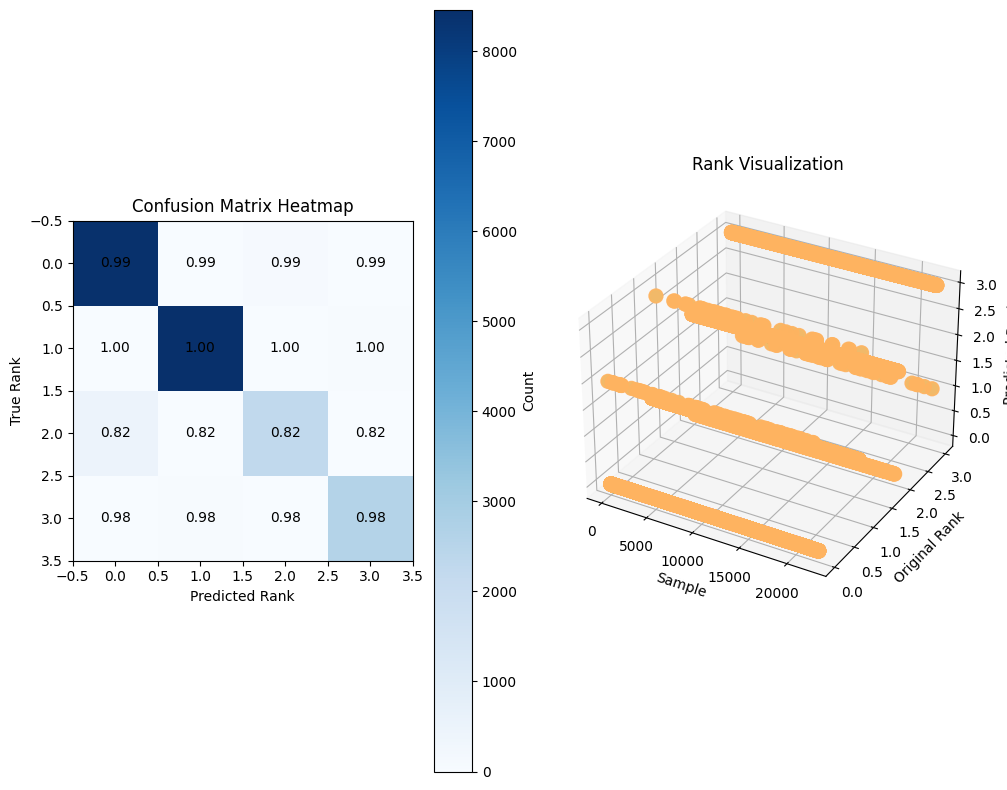

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


confusion_matrix = np.zeros((np.max(y_test_val) + 1, np.max(y_test_val) + 1), dtype=int)
for true_rank, predicted_rank in zip(y_test_val, val_predictions):
    confusion_matrix[true_rank, predicted_rank] += 1

accuracy_per_rank = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121)

heatmap = ax1.imshow(confusion_matrix, cmap='Blues')

cbar = plt.colorbar(heatmap, ax=ax1)
cbar.set_label('Count')

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax1.text(j, i, f'{accuracy_per_rank[i]:.2f}', ha='center', va='center', color='black')

ax1.set_xlabel('Predicted Rank')
ax1.set_ylabel('True Rank')
ax1.set_title('Confusion Matrix Heatmap')

x = range(len(y_test_val))
y = y_test_val
z = val_predictions

ax2 = fig.add_subplot(122, projection='3d')

unique_ranks = np.unique(y)
num_ranks = len(unique_ranks)
color_map = plt.get_cmap('rainbow')
colors = [color_map(i / num_ranks) for i in range(num_ranks)]

unique_predicted_ranks = np.unique(z)
num_predicted_ranks = len(unique_predicted_ranks)
sizes = np.linspace(20, 100, num_predicted_ranks)

for rank in unique_ranks:
    rank_indices = np.where(y == rank)[0]
    rank_size = sizes[np.where(unique_predicted_ranks == rank)[0][0]]
    ax2.scatter(np.array(x), np.array(y), np.array(z),
                c=colors[rank - unique_ranks[0]], marker='o', s=rank_size, alpha=0.9)

ax2.set_xlabel('Sample')
ax2.set_ylabel('Original Rank')
ax2.set_zlabel('Predicted Rank')

ax2.set_title('Rank Visualization')

plt.tight_layout()

plt.show()

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,max_depth=50,learning_rate= 0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test_val)

print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test_val, y_pred))))
print("R^2 Score: {:.4f}".format(r2_score(y_test_val, y_pred)))
print("ACC Score: {:.4f}".format(accuracy_score(y_test_val, y_pred)))

RMSE: 0.5863
R^2 Score: 0.6474
ACC Score: 0.9141


In [ ]:
import time
from sklearn.metrics import confusion_matrix, classification_report
def forest_test(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest))

In [ ]:
#from sklearn.manifold import LocallyLinearEmbedding

#embedding = LocallyLinearEmbedding(n_components=4)
#X_lle = embedding.fit_transform(X)

forest_test(X, y)

21.881620767999948
[[25286     0    52     0]
 [    0 25187     0   208]
 [ 7938     0   144     0]
 [    0  6871     0  1402]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     25338
           1       0.79      0.99      0.88     25395
           2       0.73      0.02      0.03      8082
           3       0.87      0.17      0.28      8273

    accuracy                           0.78     67088
   macro avg       0.79      0.54      0.51     67088
weighted avg       0.78      0.78      0.70     67088



In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 51
Reduced number of features: 1


In [ ]:
forest_test(X_lda, y)

17.592462361999992
[[11296 10206  2633  1203]
 [10422 10104  2901  1968]
 [ 2457  2859  1272  1494]
 [ 1258  2023  1571  3421]]
              precision    recall  f1-score   support

           0       0.44      0.45      0.44     25338
           1       0.40      0.40      0.40     25395
           2       0.15      0.16      0.15      8082
           3       0.42      0.41      0.42      8273

    accuracy                           0.39     67088
   macro avg       0.36      0.35      0.35     67088
weighted avg       0.39      0.39      0.39     67088



In [ ]:
#from sklearn.manifold import TSNE

#start = time.process_time()
#tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
#X_tsne = tsne.fit_transform(X)
#print(time.process_time() - start)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
y_en = LabelEncoder().fit_transform(y)
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3','PC4'])
PCA_df = pd.concat([PCA_df, df_sub['rank']], axis = 1)
PCA_df['rank'] = LabelEncoder().fit_transform(PCA_df['rank'])
PCA_df.head()

,PC1,PC2,PC3,PC4,rank
0,-1.810473,-0.428053,0.211529,0.101303,1
1,0.292998,0.742300,0.314740,-1.140255,4
2,-0.016306,-0.770603,-0.855866,0.654110,1
3,0.993902,0.675289,0.323798,1.116008,1
4,-0.147362,2.203730,1.529811,0.566838,0


In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
X_ica = ica.fit_transform(X)

In [ ]:
print(X_ica)